In [1]:
#Importar de  las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

Primeras filas para el  conjunto de datos:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  

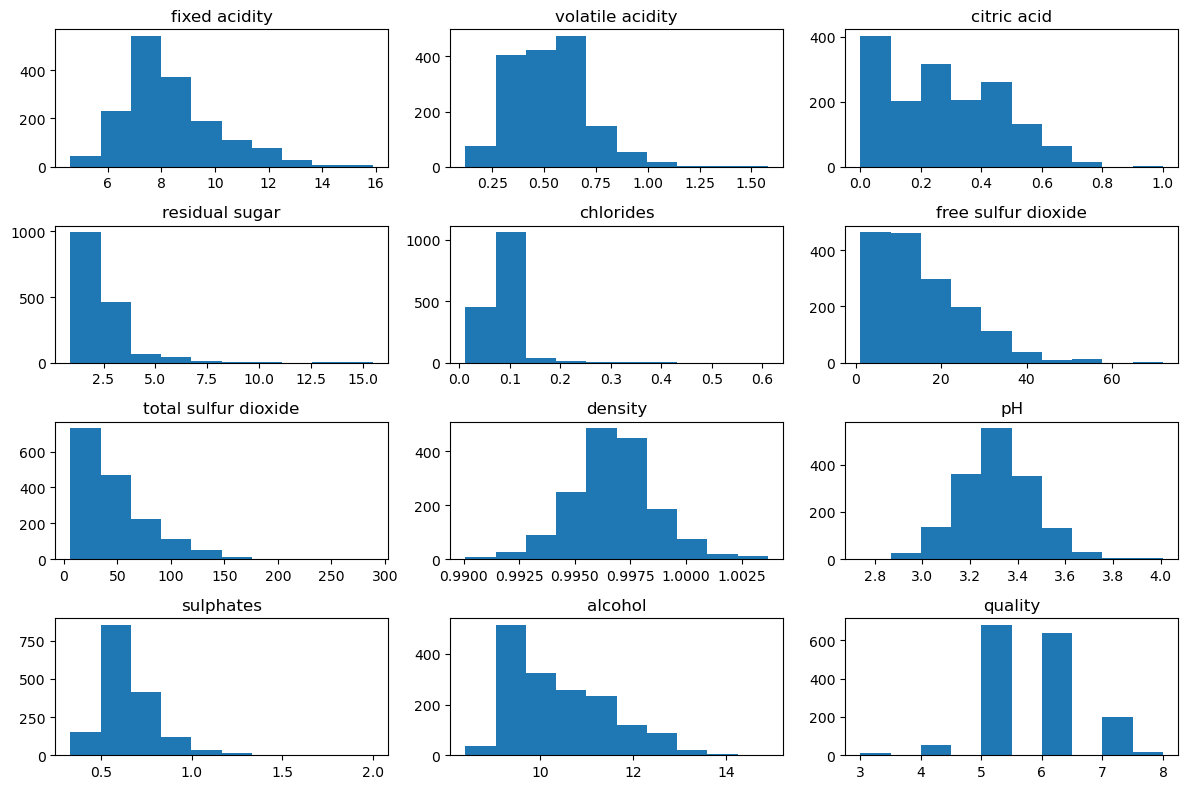


Diagramas de caja para cada característica:


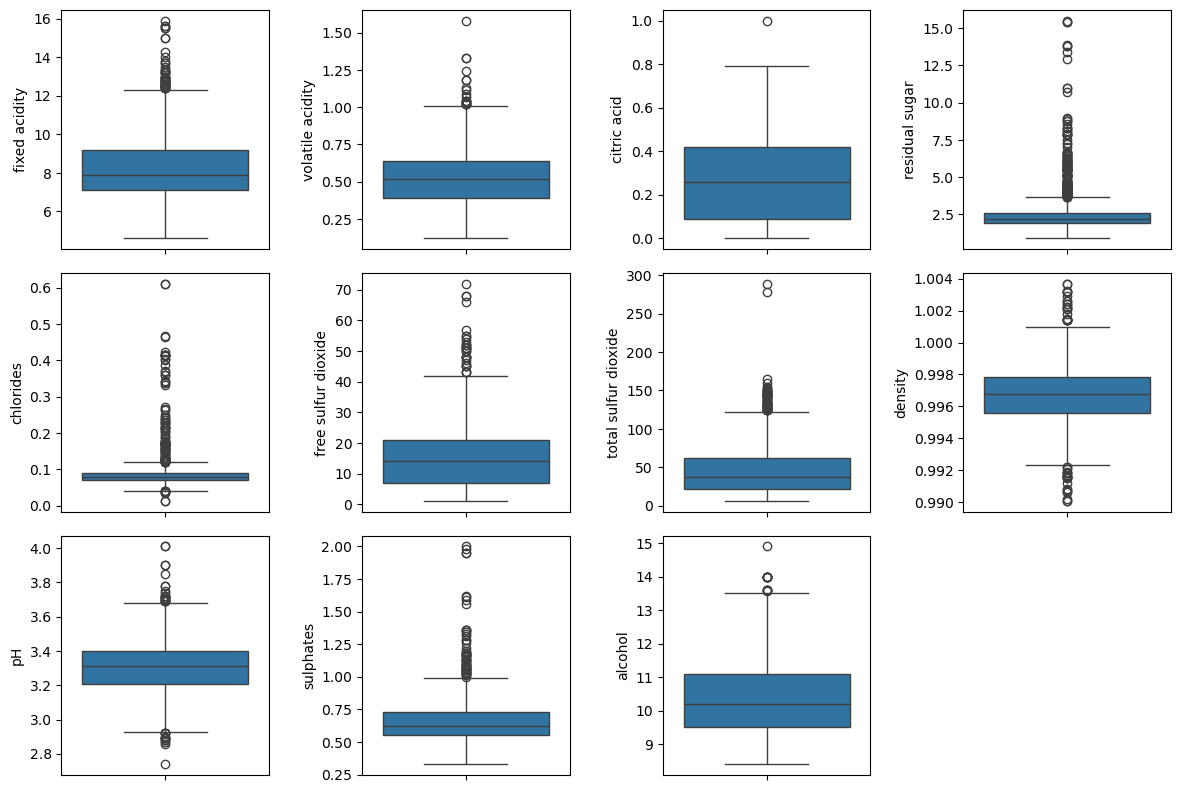


Mapa de calor de las correlaciones entre variables:


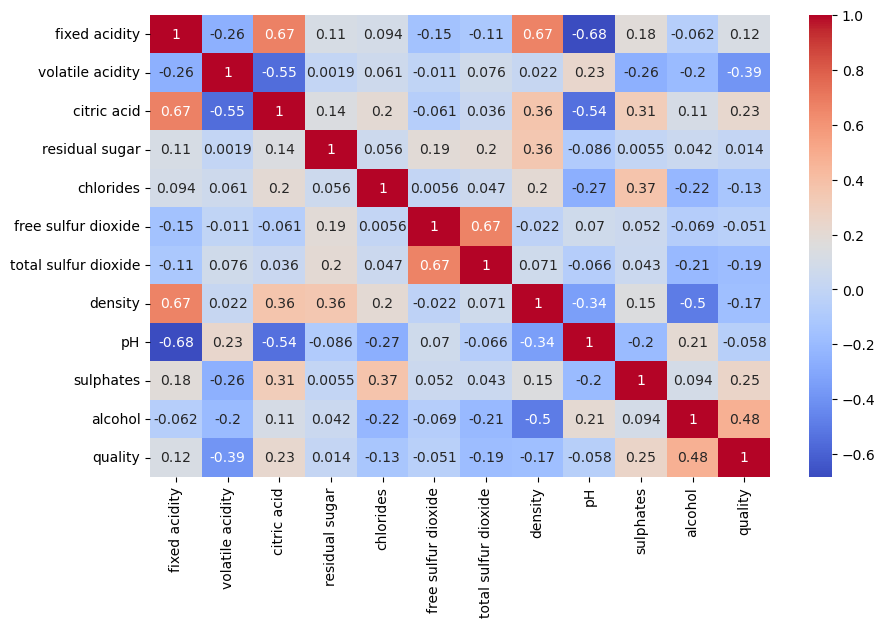

In [9]:
# Cargar los datos
data = pd.read_csv("winequality-red.csv")

# Mostra de las primeras filas del conjunto de datos para una inspección inicial
print("Primeras filas para el  conjunto de datos:")
print(data.head())

# Dimensiones del conjunto de datos
print("\nDimensiones del conjunto de datos:")
print(data.shape)

# Estadísticas descriptivas del conjunto de datos
print("\nEstadísticas descriptivas del conjunto de datos:")
print(data.describe())

# Revisión de valores nulos
print("\nRevisión de valores nulos en el conjunto de datos:")
print(data.isnull().sum())

# Histogramas para cada característica para visualizar las distribuciones
print("\nHistogramas para cada característica:")
data.hist(bins=10, figsize=(12, 8), grid=False)
plt.tight_layout()
plt.show()

# Diagramas de caja para identificar valores atípicos
print("\nDiagramas de caja para cada característica:")
plt.figure(figsize=(12, 8))
for index, column in enumerate(data.columns[:-1]):  # Excluir la columna 'quality'
    plt.subplot(3, 4, index + 1)
    sns.boxplot(y=column, data=data)
plt.tight_layout()
plt.show()

# Mapa de calor para las correlaciones entre variables
print("\nMapa de calor de las correlaciones entre variables:")
plt.figure(figsize=(10, 6))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [11]:
# 2. Preprocesamiento de los datos

# Eliminacion de datos duplicados si los hay
print(f"Número de filas antes de eliminar duplicados: {data.shape[0]}")
data.drop_duplicates(inplace=True)
print(f"Número de filas después de eliminar duplicados: {data.shape[0]}")

# Mostrar las primeras filas después del preprocesamiento
print("\nPrimeras filas después del preprocesamiento:")
print(data.head())

Número de filas antes de eliminar duplicados: 1599
Número de filas después de eliminar duplicados: 1359

Primeras filas después del preprocesamiento:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5          

In [13]:
# 3. Selección de las Características

# Preparar los datos para la selección de características
X = data.drop('quality', axis=1)  # Características
y = data['quality']  # Variable objetivo

# Entrenar un árbol de decisión para obtener la importancia de las características
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X, y)

# Obtener la importancia de las características y ordenarlas
feature_importances = pd.DataFrame(tree_clf.feature_importances_,
                                   index=X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

print("Importancia de las características:")
print(feature_importances)

# Seleccionar las características más importantes según el criterio elegido el cual es 0.05 para este caso
selected_features = feature_importances[feature_importances['importance'] > 0.03].index
print("\nCaracterísticas seleccionadas:")
print(selected_features)

# Ahora, se crea un nuevo DataFrame con las características seleccionadas para el respectivo analisis
X_selected = X[selected_features]
print("\nPrimeras filas con características seleccionadas:")
print(X_selected.head())

Importancia de las características:
                      importance
alcohol                 0.191705
sulphates               0.120978
volatile acidity        0.107451
total sulfur dioxide    0.106931
chlorides               0.092643
density                 0.069160
residual sugar          0.065150
citric acid             0.064491
pH                      0.064417
free sulfur dioxide     0.059688
fixed acidity           0.057386

Características seleccionadas:
Index(['alcohol', 'sulphates', 'volatile acidity', 'total sulfur dioxide',
       'chlorides', 'density', 'residual sugar', 'citric acid', 'pH',
       'free sulfur dioxide', 'fixed acidity'],
      dtype='object')

Primeras filas con características seleccionadas:
   alcohol  sulphates  volatile acidity  total sulfur dioxide  chlorides  \
0      9.4       0.56              0.70                  34.0      0.076   
1      9.8       0.68              0.88                  67.0      0.098   
2      9.8       0.65              0.76   

In [15]:
# 4.Dividir los datos par el  entrenamiento y prueba usando las características seleccionadas y el objetivo
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=13)

In [17]:
tree = DecisionTreeClassifier()

In [19]:
arbol = tree.fit(X_train, y_train)

[Text(0.47624694409013607, 0.9761904761904762, 'x[0] <= 9.925\ngini = 0.651\nsamples = 1087\nvalue = [7, 44, 461, 423, 137, 15]'),
 Text(0.25259088010204084, 0.9285714285714286, 'x[3] <= 98.5\ngini = 0.482\nsamples = 445\nvalue = [4.0, 21.0, 298.0, 115.0, 6.0, 1.0]'),
 Text(0.175249787414966, 0.8809523809523809, 'x[10] <= 10.05\ngini = 0.523\nsamples = 375\nvalue = [4.0, 20.0, 233.0, 111.0, 6.0, 1.0]'),
 Text(0.0860437925170068, 0.8333333333333334, 'x[8] <= 3.205\ngini = 0.492\nsamples = 336\nvalue = [2, 16, 220, 93, 5, 0]'),
 Text(0.02040816326530612, 0.7857142857142857, 'x[0] <= 9.15\ngini = 0.266\nsamples = 76\nvalue = [0, 0, 64, 12, 0, 0]'),
 Text(0.013605442176870748, 0.7380952380952381, 'x[3] <= 79.5\ngini = 0.494\nsamples = 9\nvalue = [0, 0, 5, 4, 0, 0]'),
 Text(0.01020408163265306, 0.6904761904761905, 'x[0] <= 9.05\ngini = 0.32\nsamples = 5\nvalue = [0, 0, 1, 4, 0, 0]'),
 Text(0.006802721088435374, 0.6428571428571429, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0]'),
 Tex

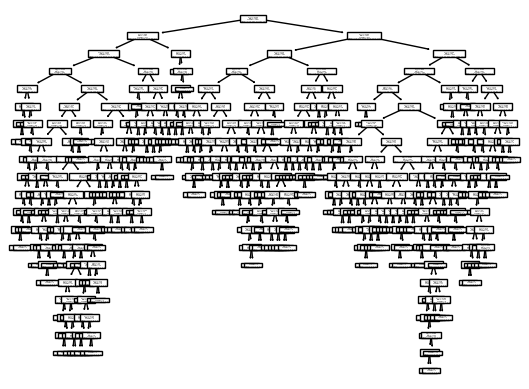

In [21]:
plot_tree(arbol)

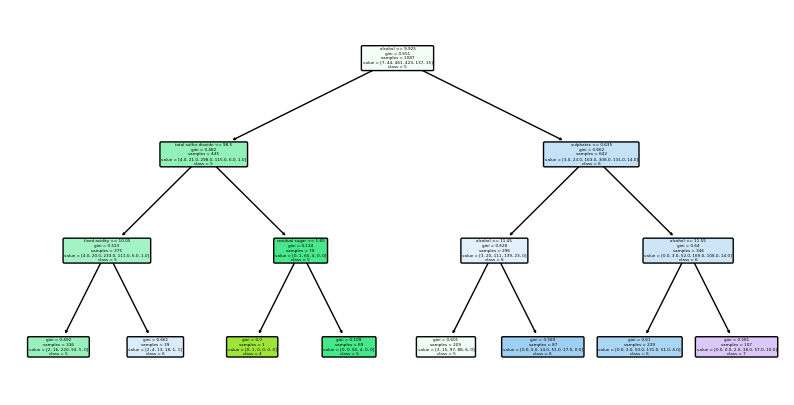

In [73]:
# 5. Entrenamiento del Modelo
from sklearn.tree import DecisionTreeClassifier

# Inicializar el modelo de árbol de decisión con hiperparámetros específicos
# Los hiperparámetros se ajustan para obtener el mejor rendimiento posible
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X_train, y_train)

# Visualización del árbol
plt.figure(figsize=(10,5))
plot_tree(tree_clf, feature_names=X_train.columns, class_names=tree_clf.classes_.astype(str), filled=True, rounded=True)
plt.show()

[Text(0.47624694409013607, 0.9761904761904762, 'x[0] <= 9.925\ngini = 0.651\nsamples = 1087\nvalue = [7, 44, 461, 423, 137, 15]'),
 Text(0.25259088010204084, 0.9285714285714286, 'x[3] <= 98.5\ngini = 0.482\nsamples = 445\nvalue = [4.0, 21.0, 298.0, 115.0, 6.0, 1.0]'),
 Text(0.175249787414966, 0.8809523809523809, 'x[10] <= 10.05\ngini = 0.523\nsamples = 375\nvalue = [4.0, 20.0, 233.0, 111.0, 6.0, 1.0]'),
 Text(0.0860437925170068, 0.8333333333333334, 'x[8] <= 3.205\ngini = 0.492\nsamples = 336\nvalue = [2, 16, 220, 93, 5, 0]'),
 Text(0.02040816326530612, 0.7857142857142857, 'x[0] <= 9.15\ngini = 0.266\nsamples = 76\nvalue = [0, 0, 64, 12, 0, 0]'),
 Text(0.013605442176870748, 0.7380952380952381, 'x[3] <= 79.5\ngini = 0.494\nsamples = 9\nvalue = [0, 0, 5, 4, 0, 0]'),
 Text(0.01020408163265306, 0.6904761904761905, 'x[0] <= 9.05\ngini = 0.32\nsamples = 5\nvalue = [0, 0, 1, 4, 0, 0]'),
 Text(0.006802721088435374, 0.6428571428571429, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0]'),
 Tex

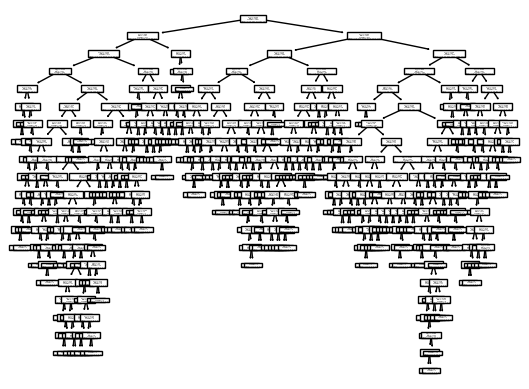

In [75]:
plot_tree(arbol)

In [93]:
predicciones

array([5, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 7, 5, 5, 5, 5, 5, 5, 6, 6,
       6, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5, 7, 5, 6, 5, 5, 5, 5, 5, 6, 6, 6,
       6, 5, 5, 5, 6, 5, 5, 6, 5, 7, 5, 6, 6, 6, 5, 5, 5, 7, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 6, 6, 5, 5, 6, 5, 6, 5,
       5, 6, 5, 6, 5, 5, 6, 5, 6, 7, 5, 5, 5, 5, 6, 7, 7, 5, 5, 5, 6, 5,
       5, 6, 6, 6, 5, 6, 5, 5, 5, 6, 6, 5, 5, 6, 6, 6, 5, 5, 6, 7, 5, 7,
       5, 5, 6, 6, 6, 5, 5, 6, 6, 7, 5, 5, 7, 6, 6, 5, 5, 6, 6, 5, 6, 5,
       6, 5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 7, 5, 5, 6, 5, 6, 6, 4, 5, 5,
       5, 5, 6, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 7, 7, 6, 5, 6, 5, 5, 5, 5,
       5, 5, 6, 6, 5, 5, 5, 7, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 7, 6,
       5, 6, 7, 5, 5, 6, 7, 6, 5, 5, 5, 6, 6, 5, 6, 6, 5, 5, 6, 7, 5, 5,
       5, 6, 5, 6, 7, 6, 6, 6, 6, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 6, 5, 7,
       5, 5, 6, 6, 5, 6, 5, 6], dtype=int64)

In [95]:
#6. Evalua el Desempeño del Modelo
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predicciones en el conjunto de prueba
y_pred = tree_clf.predict(X_test)

# Cálculo de métricas de rendimiento
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.5661764705882353
Recall: 0.5661764705882353
F1 Score: 0.5392778698500701


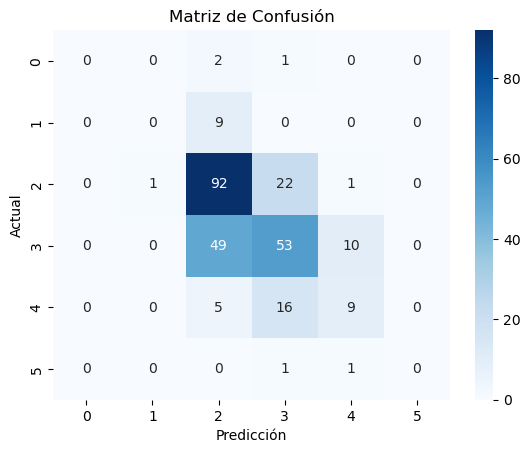

In [97]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matri = confusion_matrix(y_test, y_pred)

# Visualización de la matriz de confusión con Seaborn
sns.heatmap(conf_matri, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicción')
plt.title('Matriz de Confusión')
plt.show()

In [105]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.5661764705882353